In [44]:
from lake import FrozenLakeEnvStop
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import seaborn as sns

from copy import copy

from run_expe_tool import test_algo, run_expe, run_multiple_expe

from algo import TabQLearningControlerFeedback, TabQLearning

%matplotlib inline

In [45]:
game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)

In [54]:
print(game.reset())
print(game.render())
print(0, game.step(0))
print(1, game.step(1))
print(1, game.step(1))
print(1, game.step(1))
print(2, game.step(2))
print(game.step(2))
print(game.step(2))
print(game.step(1))
print(game.step(2))


{'state': 0, 'gave_feedback': False}

SFFF
FHFH
FFFH
HFFG
None
0 ({'state': 0, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
1 ({'state': 4, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
1 ({'state': 8, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
1 ({'state': 8, 'gave_feedback': True}, 0, False, {'prob': 1.0})
2 ({'state': 9, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
({'state': 10, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
({'state': 10, 'gave_feedback': True}, 0, False, {'prob': 1.0})
({'state': 14, 'gave_feedback': False}, 0.0, False, {'prob': 1.0})
({'state': 15, 'gave_feedback': False}, 1.0, True, {'prob': 1.0})


In [4]:
print(game.observation_space)
print(game.action_space)
# action are : 0 Left     1 Down      2  RIGHT     3 UP    

Discrete(16)
Discrete(4)


In [9]:
gamma = 0.99
expected_exploration_steps = 2000

create_algo = lambda: TabQLearning(16, 4, gamma=gamma,
                                   lr=0.1, expected_exploration_steps=expected_exploration_steps)

game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)
run_res = run_expe(create_algo, game, verbose=True, n_episodes_train=200, n_tests=1, percentage_to_success=0.9)

End of ep #00000 in 052 steps, cumul_reward = 1.0, current_eps = 0.9382395300957113
End of ep #00001 in 100 steps, cumul_reward = 0.0, current_eps = 0.8279934791918915
End of ep #00002 in 014 steps, cumul_reward = 1.0, current_eps = 0.8136296434440144
End of ep #00003 in 009 steps, cumul_reward = 1.0, current_eps = 0.8045276049198279
End of ep #00004 in 049 steps, cumul_reward = 1.0, current_eps = 0.7567290618346934
End of ep #00005 in 058 steps, cumul_reward = 1.0, current_eps = 0.7038077799148161


In [11]:
gamma = 0.99
expected_exploration_steps = 2000
margin = 0.2
lr = 0.7

create_algo = lambda: TabQLearningControlerFeedback(16, 4, gamma=gamma,
                                                    lr=lr, expected_exploration_steps=expected_exploration_steps,
                                                    margin=margin)

game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)
run_res = run_expe(create_algo, game, verbose=True, n_episodes_train=200, n_tests=1, percentage_to_success=0.9)

End of ep #00000 in 044 steps, cumul_reward = 1.0, current_eps = 0.9476689941381445
End of ep #00001 in 072 steps, cumul_reward = 1.0, current_eps = 0.866104247057467
End of ep #00002 in 015 steps, cumul_reward = 1.0, current_eps = 0.8500160902253981
End of ep #00003 in 016 steps, cumul_reward = 1.0, current_eps = 0.8331846439283305
End of ep #00004 in 067 steps, cumul_reward = 1.0, current_eps = 0.7662475416683708


Frozen-Lake Deterministe avec Feedback
-------------------

Q-Learning Tabulaire, pas de récompenses négatives

Total steps to solve environment, mean 1761.052, std 5004.9857044047585
Number of episodes mean 19.27, std 49.39207527529087
Number of failure to solve env 35
Number of episodes when not failing 5.741935483870968


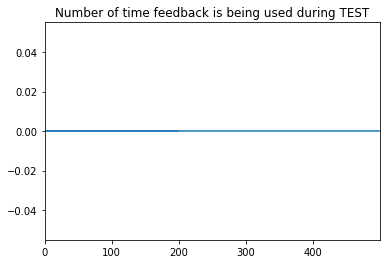

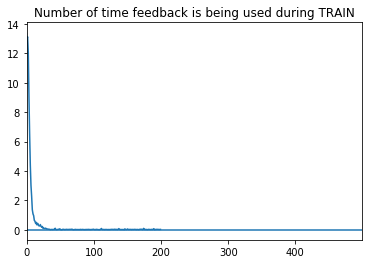

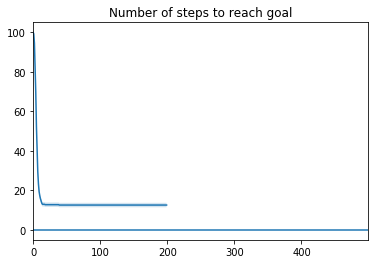

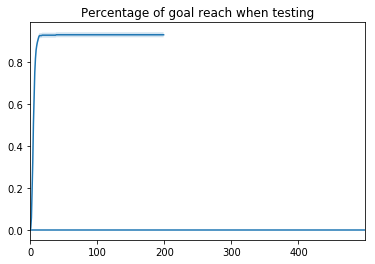

In [204]:
gamma = 0.99
expected_exploration_steps = 3000
lr=0.7

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)
game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)

res_det_no_feedback = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200)

Q-Learning Tabulaire, récompenses négatives de l'environement

Total steps to solve environment, mean 1108.798, std 3756.3223601277887
Number of episodes mean 12.848, std 37.07971003122867
Number of failure to solve env 19
Number of episodes when not failing 5.494802494802495


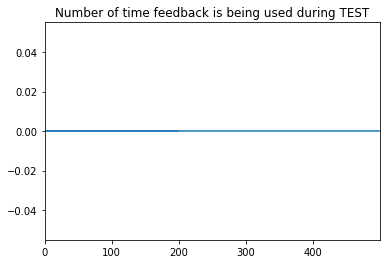

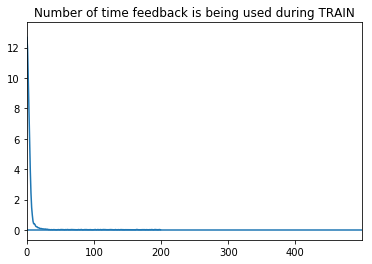

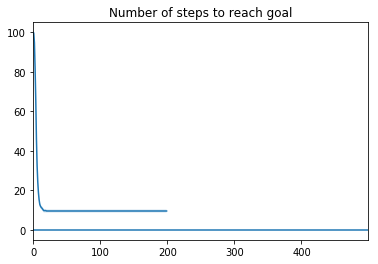

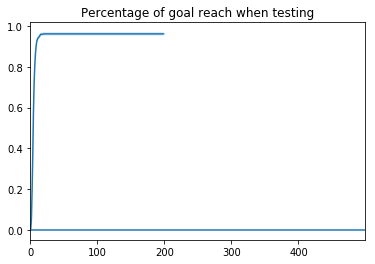

In [201]:
gamma = 0.99
expected_exploration_steps = 3000
reward_when_falling = -0.1
lr = 0.7

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)
game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=reward_when_falling)

res_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200)

Q-Learning Tabulaire inclusion du Feedback, pas de récompenses négatives de l'environnement

Total steps to solve environment, mean 1173.276, std 3847.0913266809766
Number of episodes mean 13.646, std 37.92688603088843
Number of failure to solve env 20
Number of episodes when not failing 5.922916666666667


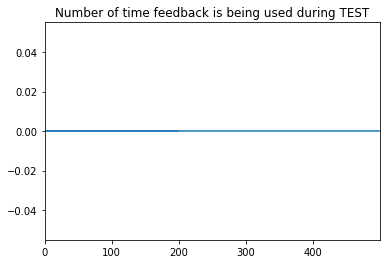

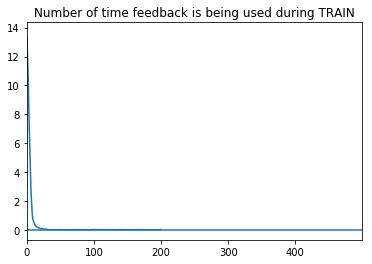

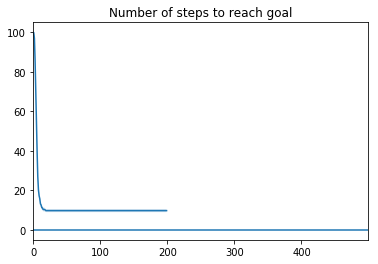

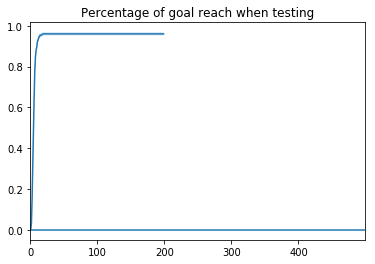

In [203]:
gamma = 0.99
expected_exploration_steps = 3000
margin= 0.2
lr = 0.7

algo = lambda : TabQLearningControlerFeedback(16, 4, gamma=gamma, lr=lr,
                                        expected_exploration_steps=expected_exploration_steps, margin=margin)

game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)

res_det_neg_feedback = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200)

Frozen-Lake Non-Deterministe avec Feedback
-------------------

In [55]:
print(game.render())

game = FrozenLakeEnvStop(is_slippery=False, reward_when_falling=0)
print("deterministe", game.P)


game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=0)
print("non deterministic", game.P)

  (Right)
SFFF
FHFH
FFFH
HFFG
None
deterministe {0: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 4, 0.0, False)], 2: [(1.0, 1, 0.0, False)], 3: [(1.0, 0, 0.0, False)]}, 1: {0: [(1.0, 0, 0.0, False)], 1: [(1.0, 5, 0.0, True)], 2: [(1.0, 2, 0.0, False)], 3: [(1.0, 1, 0.0, False)]}, 2: {0: [(1.0, 1, 0.0, False)], 1: [(1.0, 6, 0.0, False)], 2: [(1.0, 3, 0.0, False)], 3: [(1.0, 2, 0.0, False)]}, 3: {0: [(1.0, 2, 0.0, False)], 1: [(1.0, 7, 0.0, True)], 2: [(1.0, 3, 0.0, False)], 3: [(1.0, 3, 0.0, False)]}, 4: {0: [(1.0, 4, 0.0, False)], 1: [(1.0, 8, 0.0, False)], 2: [(1.0, 5, 0.0, True)], 3: [(1.0, 0, 0.0, False)]}, 5: {0: [(1.0, 5, 0, True)], 1: [(1.0, 5, 0, True)], 2: [(1.0, 5, 0, True)], 3: [(1.0, 5, 0, True)]}, 6: {0: [(1.0, 5, 0.0, True)], 1: [(1.0, 10, 0.0, False)], 2: [(1.0, 7, 0.0, True)], 3: [(1.0, 2, 0.0, False)]}, 7: {0: [(1.0, 7, 0, True)], 1: [(1.0, 7, 0, True)], 2: [(1.0, 7, 0, True)], 3: [(1.0, 7, 0, True)]}, 8: {0: [(1.0, 8, 0.0, False)], 1: [(1.0, 12, 0.0, True)], 2: [(1.0, 9, 0.0,

This seems very easy to solve because of the controller stopping from doing stupid stuff, the explo is easy.

Q-Learning Tabulaire, pas de récompenses négatives

Total steps to solve environment, mean 7613.722, std 373.7819534380974
Number of episodes mean 199.0, std 0.0
Number of failure to solve env 500
Number of episodes when not failing nan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice.


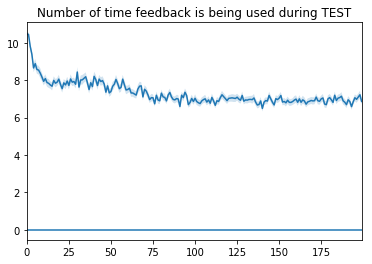

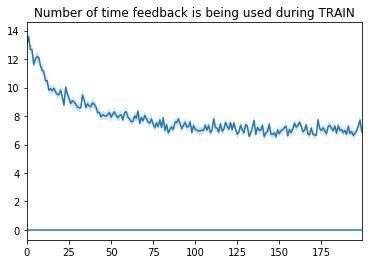

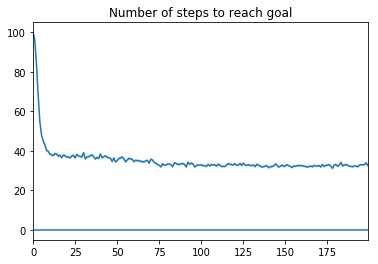

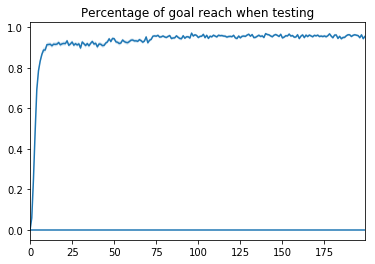

In [236]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.7
reward_when_falling = 0


algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_no_feed = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200)

Q-Learning Tabulaire, récompenses négatives de l'environnement

Total steps to solve environment, mean 10388.186, std 441.6954781339741
Number of episodes mean 199.0, std 0.0
Number of failure to solve env 500
Number of episodes when not failing nan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice.


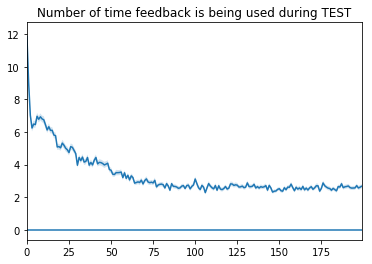

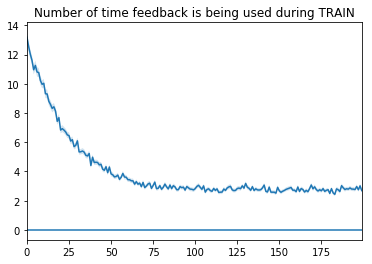

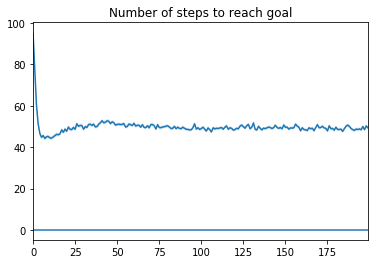

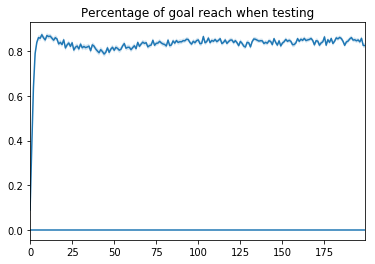

In [243]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.7
reward_when_falling = -0.1

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200, n_tests=5)

Total steps to solve environment, mean 8409.152, std 2242.1496740619255
Number of episodes mean 181.262, std 48.13706841925461
Number of failure to solve env 427
Number of episodes when not failing 77.5068493150685


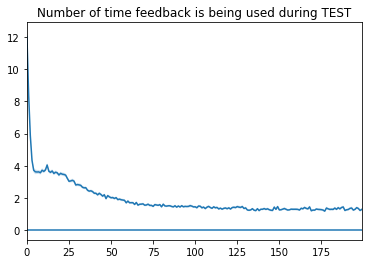

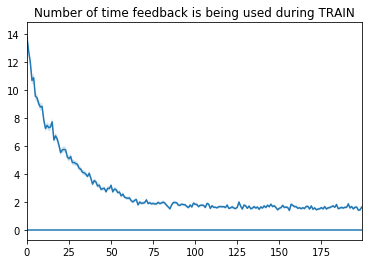

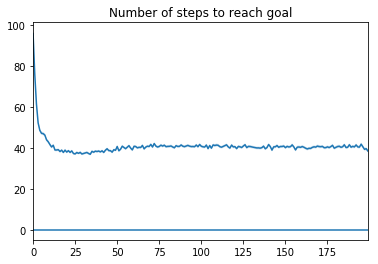

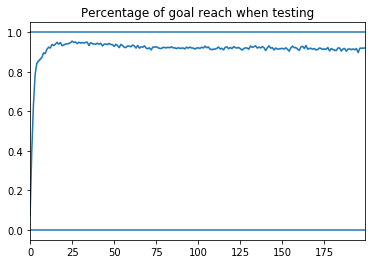

In [24]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.3
reward_when_falling = -0.1

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200, n_tests=5)

Q-Learning Tabulaire inclusion du Feedback, pas de récompenses négatives de l'environnement

Total steps to solve environment, mean 12173.032, std 612.1939978274861
Number of episodes mean 199.0, std 0.0
Number of failure to solve env 500
Number of episodes when not failing nan


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice.


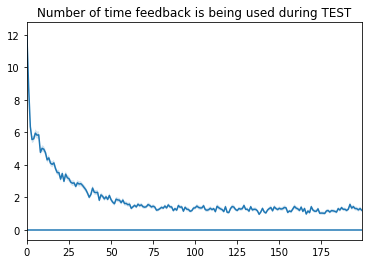

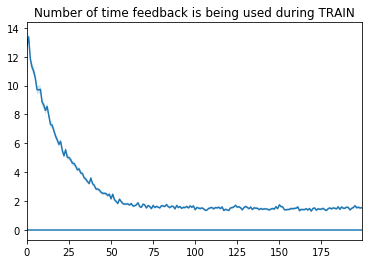

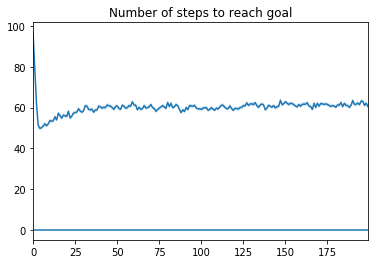

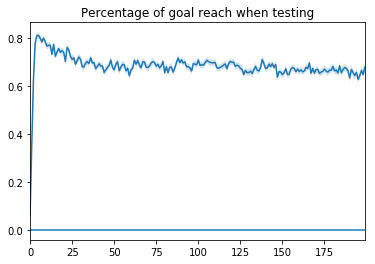

In [245]:
gamma = 0.99
expected_exploration_steps = 3000
margin= 0.2
lr = 0.7
reward_when_falling = 0


algo = lambda : TabQLearningControlerFeedback(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps, margin=margin)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_control_feed = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200, n_tests=5)

Total steps to solve environment, mean 10311.524, std 1543.6208217771616
Number of episodes mean 193.754, std 26.241064841198803
Number of failure to solve env 475
Number of episodes when not failing 94.08


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


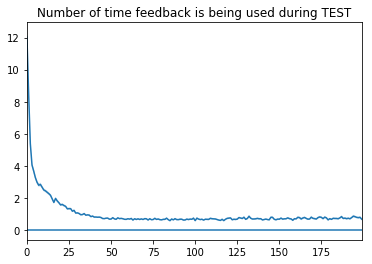

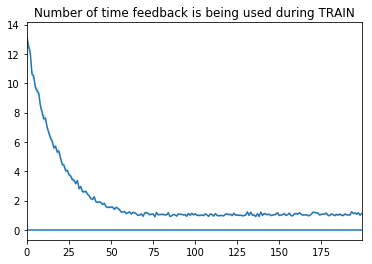

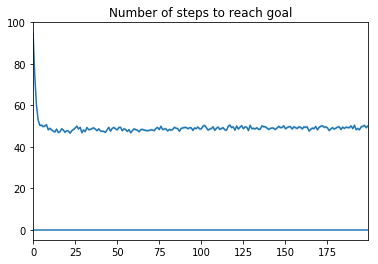

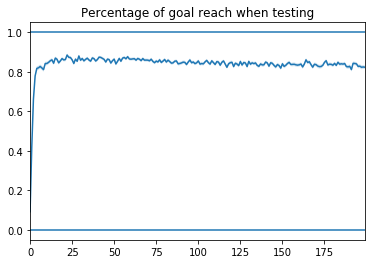

In [21]:
gamma = 0.99
expected_exploration_steps = 3000
margin= 0.1
lr = 0.3
reward_when_falling = 0


algo = lambda : TabQLearningControlerFeedback(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps, margin=margin)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_control_feed = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200, n_tests=5)

Total steps to solve environment, mean 8720.152, std 2160.3191710707933
Number of episodes mean 183.442, std 42.6334919517508
Number of failure to solve env 404
Number of episodes when not failing 117.96875


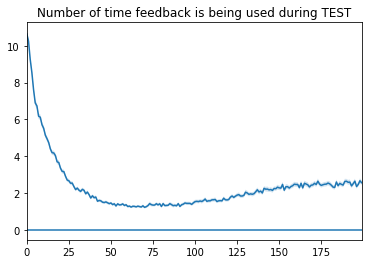

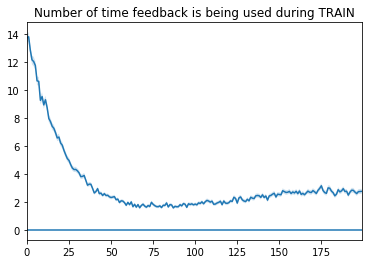

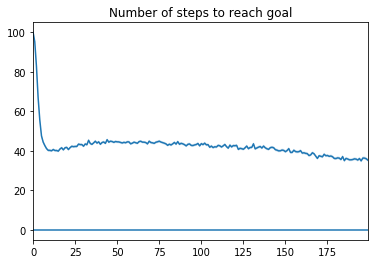

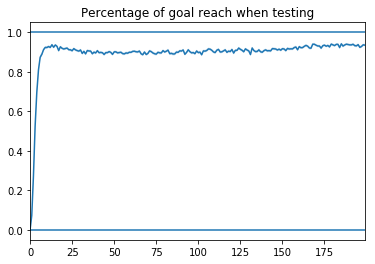

In [23]:
gamma = 0.99
expected_exploration_steps = 3000
margin= 0
lr = 0.3
reward_when_falling = 0


algo = lambda : TabQLearningControlerFeedback(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps, margin=margin)
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling)

res_non_det_control_feed = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=200, n_tests=5)

Frozen-Lake Non-Deterministe avec Feedback AVEC RESET (Tu tombes, ça reset)
-------------------

In [14]:
reward_when_falling = -0.1
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling, reset_when_falling=True)

Total steps to solve environment, mean 10792.752, std 1572.9195702565344
Number of episodes mean 493.78, std 36.33752330580608
Number of failure to solve env 485
Number of episodes when not failing 325.0


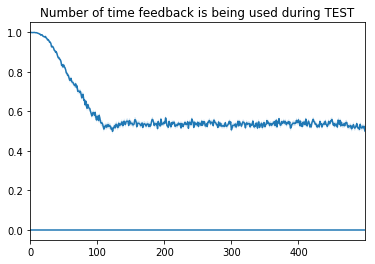

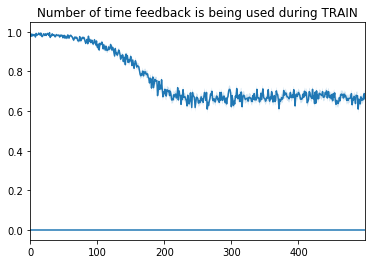

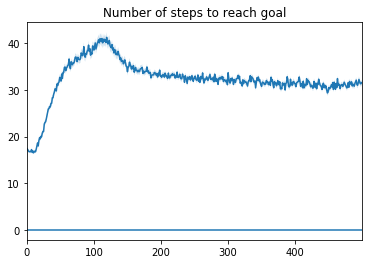

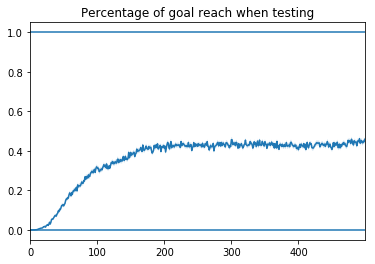

In [23]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.3

reward_when_falling = -0.1
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling, reset_when_falling=True)

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)

res_non_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=500, n_tests=5, percentage_to_success=0.9)

Total steps to solve environment, mean 8139.098, std 1087.72473006547
Number of episodes mean 496.54, std 26.19237293564674
Number of failure to solve env 494
Number of episodes when not failing 294.0


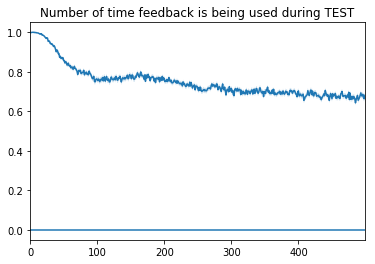

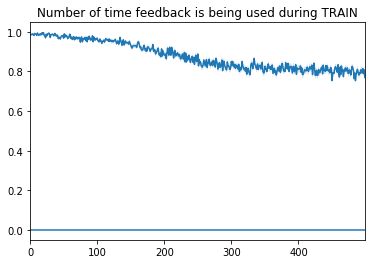

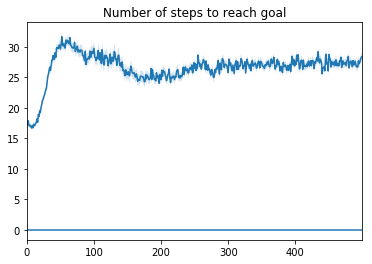

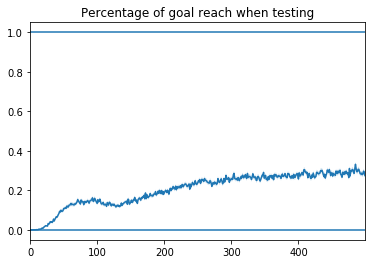

In [26]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.7

reward_when_falling = -0.1
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling, reset_when_falling=True)

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)

res_non_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=500, n_tests=5, percentage_to_success=0.9)

Total steps to solve environment, mean 13947.71, std 2812.6839335232817
Number of episodes mean 490.966, std 50.24194307548226
Number of failure to solve env 484
Number of episodes when not failing 247.9375


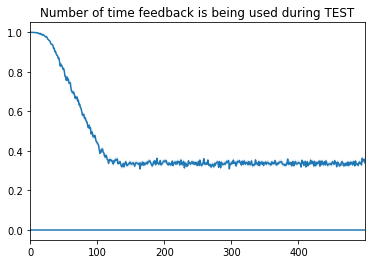

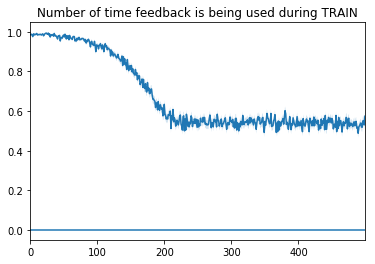

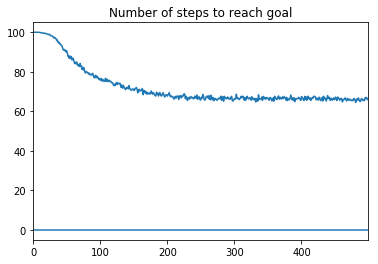

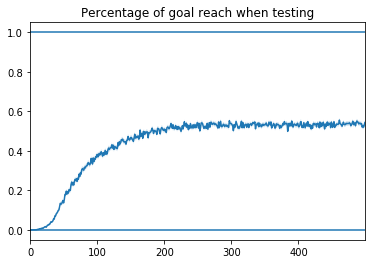

In [33]:
gamma = 0.99
expected_exploration_steps = 3000
lr = 0.1

reward_when_falling = -0.1
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling, reset_when_falling=True)

algo = lambda : TabQLearning(16, 4, gamma=gamma, lr=lr, expected_exploration_steps=expected_exploration_steps)

res_non_det_neg_rew = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=500, n_tests=5, percentage_to_success=0.9)

Total steps to solve environment, mean 13145.842, std 1877.4197839151477
Number of episodes mean 490.122, std 47.01058514845353
Number of failure to solve env 475
Number of episodes when not failing 321.44


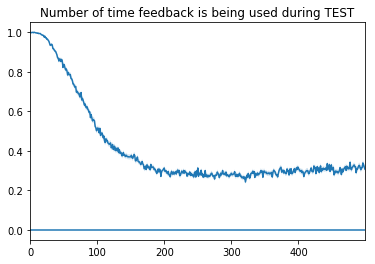

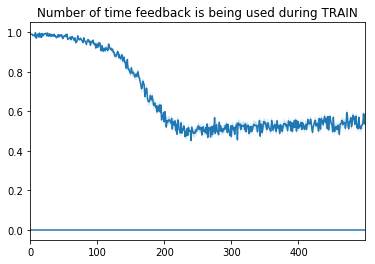

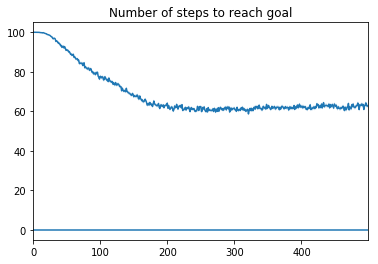

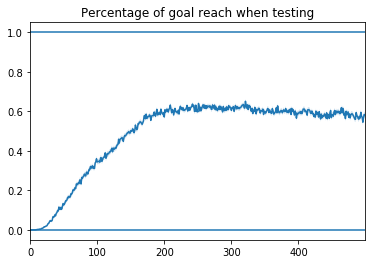

In [34]:
gamma = 0.99
expected_exploration_steps = 3000
margin= 0.1
lr = 0.3

reward_when_falling = 0
game = FrozenLakeEnvStop(is_slippery=True, reward_when_falling=reward_when_falling, reset_when_falling=True)

algo = lambda : TabQLearningControlerFeedback(16, 4, gamma=gamma, lr=lr, 
                                            expected_exploration_steps=expected_exploration_steps, margin=margin)
res_non_det_reset_control_feed = run_multiple_expe(algo, game, n_expe=500, n_episodes_train=500,
                                                   n_tests=5, percentage_to_success=0.9)

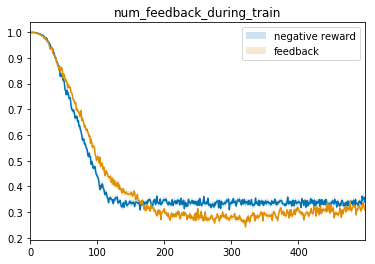

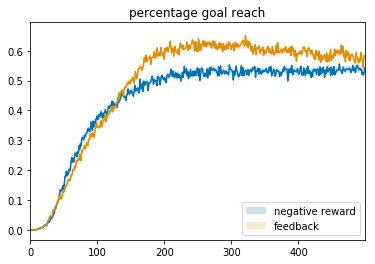

In [43]:
res_non_det_neg_rew
res_non_det_reset_control_feed
# total_steps_array, num_feedback_per_train_ep, num_feedback_per_test_ep,
#  num_steps_array, percentage_goal_reach_array

color1 = sns.color_palette('colorblind')[0]
color2 = sns.color_palette('colorblind')[1]

sns.tsplot(data=res_non_det_neg_rew[2], color=color1, legend=True)
sns.tsplot(data=res_non_det_reset_control_feed[2], color=color2, legend=True)
plt.legend(["negative reward", "feedback"])
plt.title("num_feedback_during_train")
plt.show()

sns.tsplot(data=res_non_det_neg_rew[4], color=color1, legend=True)
sns.tsplot(data=res_non_det_reset_control_feed[4], color=color2, legend=True)
plt.legend(["negative reward", "feedback"])
plt.title("percentage goal reach")
plt.show()

